In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf 
import matplotlib.pyplot as plt
import json

2023-06-01 01:50:42.431216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


# Import Data

In [16]:
dataset = pd.read_csv('../data/data3.csv', index_col=0)
dataset['label'] = [int(s[-1]) for s in dataset['label']]
dataset

,index,middle,ring,pinky,label
0,"[703.4, 703.5, 703.7, 703.9, 704.4, 705.0, 705...","[693.8, 693.8, 693.8, 693.8, 693.8, 693.9, 694...","[727.8, 727.8, 727.8, 727.8, 727.8, 727.9, 728...","[721.0, 721.0, 720.8, 720.1, 718.9, 717.2, 715...",0
1,"[702.0, 702.1, 702.4, 702.9, 703.6, 704.6, 705...","[693.0, 693.0, 693.0, 692.9, 692.9, 692.9, 692...","[727.4, 727.4, 727.3, 727.2, 727.2, 727.3, 727...","[722.2, 722.0, 721.4, 720.4, 718.9, 717.1, 715...",0
2,"[702.4, 702.5, 702.8, 703.5, 704.3, 705.4, 706...","[692.8, 692.8, 692.9, 692.8, 692.8, 692.7, 692...","[728.0, 728.0, 728.0, 727.9, 727.8, 727.7, 727...","[717.2, 716.9, 716.1, 714.8, 713.2, 711.3, 709...",0
3,"[704.8, 704.9, 705.3, 705.9, 706.8, 707.8, 708...","[693.4, 693.4, 693.3, 693.3, 693.1, 693.0, 692...","[727.4, 727.3, 727.2, 727.1, 727.0, 726.8, 726...","[714.8, 714.5, 713.5, 711.8, 709.8, 707.5, 705...",0
4,"[706.2, 706.3, 706.5, 706.9, 707.4, 708.0, 708...","[692.0, 692.0, 691.9, 691.9, 691.7, 691.6, 691...","[726.0, 726.0, 726.0, 726.0, 726.0, 726.0, 726...","[711.4, 711.3, 710.7, 709.7, 708.2, 706.3, 704...",0
...,...,...,...,...,...
2495,"[545.0, 544.9, 544.7, 544.3, 543.7, 543.0, 542...","[530.4, 530.4, 530.2, 529.9, 529.4, 528.7, 528...","[572.2, 572.1, 571.9, 571.5, 570.9, 570.0, 569...","[543.8, 543.8, 543.7, 543.6, 543.4, 543.1, 542...",4
2496,"[543.2, 543.1, 543.0, 542.9, 542.7, 542.4, 542...","[534.2, 534.2, 534.2, 534.1, 534.0, 533.7, 533...","[577.0, 577.1, 577.4, 577.8, 578.2, 578.4, 578...","[548.2, 548.2, 548.2, 548.2, 548.2, 548.1, 548...",4
2497,"[539.8, 539.7, 539.6, 539.4, 539.2, 538.8, 538...","[532.0, 532.0, 531.8, 531.5, 531.2, 530.8, 530...","[578.6, 578.5, 578.3, 578.0, 577.5, 576.9, 576...","[550.0, 550.0, 549.9, 549.7, 549.5, 549.3, 549...",4
2498,"[546.6, 546.6, 546.4, 546.0, 545.5, 544.9, 544...","[531.0, 531.0, 531.0, 530.9, 530.6, 530.2, 529...","[575.2, 575.2, 575.2, 575.2, 575.1, 574.9, 574...","[545.8, 545.8, 545.8, 545.7, 545.6, 545.3, 545...",4


# Create Train/Val/Test Dataset

In [5]:
## X
n_steps = len(json.loads(dataset.iloc[0,0]))
n_features = 4
X = np.empty((dataset.shape[0], n_steps*n_features), dtype=np.float64)
for i in range(X.shape[0]):    
    x = []
    for j in range(n_features):
        arr = list(json.loads(dataset.iloc[i,j]))
        x += arr
    X[i] = np.array(x)

## y
labels = dataset["label"].to_numpy()
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
n_classes = len(np.unique(y_encoded))
y = to_categorical(y_encoded)

## split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)

(1225, 40) (1225, 5)


# Model Training

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense (Dense)         (None, 128)               5248      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 second_dense (Dense)        (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 third_dense (Dense)         (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 fourth_dense (Dense)        (None, 32)               

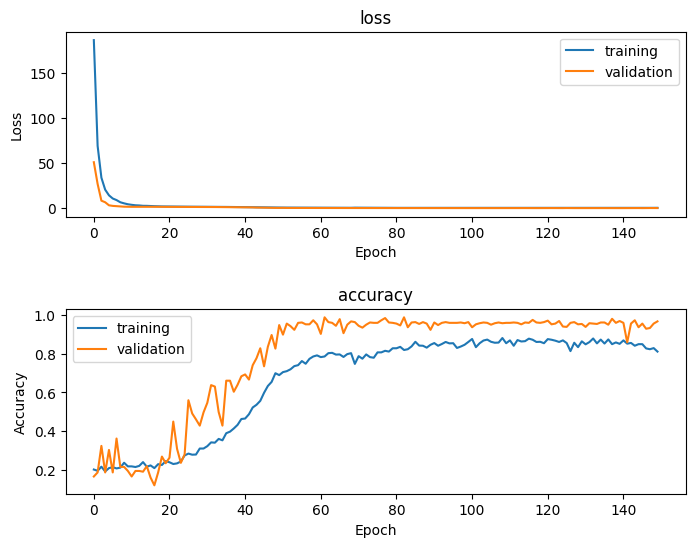

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_steps*n_features,), name='first_dense'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', name='third_dense'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', name='fourth_dense'))
model.add(Dense(n_classes, activation='softmax', name='final_dense'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the MLP model.
history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_val, y_val))
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[0].plot(history.epoch,history.history['loss'], label='training')
axes[0].plot(history.epoch,history.history['val_loss'], label='validation')
axes[0].set_title('loss')
axes[0].legend(loc='best')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
fig.subplots_adjust(hspace=0.5)
axes[1].plot(history.epoch,history.history['accuracy'], label='training')
axes[1].plot(history.epoch,history.history['val_accuracy'], label='validation')
axes[1].set_title('accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best');

In [9]:
print("Train accuracy:", history.history["accuracy"][-1])
print("Validation accuracy:", history.history["val_accuracy"][-1])
print("Test accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])

Train accuracy: 0.8114285469055176
Validation accuracy: 0.9676190614700317
Test accuracy: 0.9440000057220459


# Model Evaluation

In [10]:
model.save("../models/model3")
# model = keras.models.load_model("../models/model2")

2023-06-01 01:52:29.576476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-06-01 01:52:29.586750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-06-01 01:52:29.597907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-06-01 01:52:2

INFO:tensorflow:Assets written to: ../models/model3/assets


Precision: 0.9537031161872532
Recall: 0.9444715770903175
F1-score: 0.9469771634529673


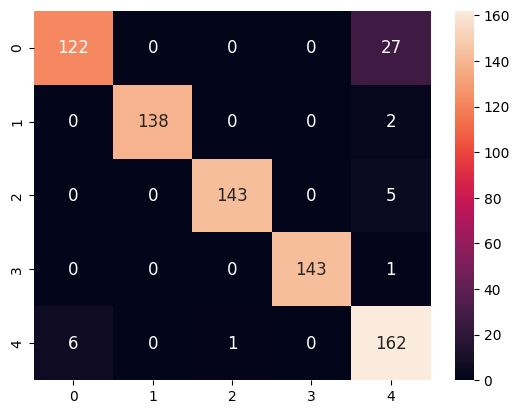

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(x_test, verbose=0)
y_pred_rd = np.argmax(y_pred, axis=1)
y_test_rd = np.argmax(y_test, axis=1)

print("Precision:", precision_score(y_test_rd, y_pred_rd, average="macro"))
print("Recall:", recall_score(y_test_rd, y_pred_rd, average="macro"))
print("F1-score:", f1_score(y_test_rd, y_pred_rd, average="macro"))

cm = confusion_matrix(y_test_rd, y_pred_rd)
df_cm = pd.DataFrame(cm, range(n_classes), range(n_classes))
# plt.figure(figsize=(13,11))
# sn.set(font_scale=1) # for label size
ticklabels = np.unique(labels)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="d",
           xticklabels=ticklabels, yticklabels=ticklabels) # font size
plt.show()

In [17]:
import time 
times = []
for i in range(100):
    start = time.time()
    y_prediction = model.predict(x_test, verbose=0) 
    end = time.time()
    times.append((end - start)/x_test.shape[0] * 1000)
print("Inference time: %f ms" % (np.mean(np.array(times))))

Inference time: 0.068023 ms


In [15]:
model.save("mlp")

INFO:tensorflow:Assets written to: mlp/assets


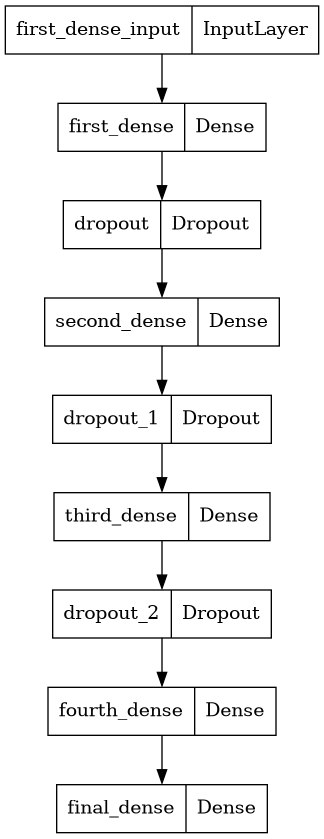

In [4]:
keras.utils.plot_model(model)